In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
import random
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [2]:
epochs = 1
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []

image_files = [f for f in glob.glob(r"C:\\Users\\Fader\\Dev\\detection\\dataset_gender" + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

for img in image_files:
    image = cv2.imread(img)
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)
    label = img.split(os.path.sep)[-2]
    if label == "woman":
        label = 1
    else:
        label = 0    
    labels.append([label])

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1
    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(classes))
    model.add(Activation("sigmoid"))
    return model

model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

#model.save('gender.model')
#plt.style.use("ggplot")
#plt.figure()
#N = epochs
#plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0,N), H.history["acc"], label="train_acc")
#plt.plot(np.arange(0,N), H.history["val_acc"], label="val_acc")
#plt.title("Training Loss and Accuracy")
#plt.xlabel("Epoch #")
#plt.ylabel("Loss/Accuracy")
#plt.legend(loc="upper right")
#plt.savefig('plot_gender.png')

C:\Users\Fader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Fader\AppData\Local\Temp\ipykernel_11484\1700152665.py:80: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


25/25 [==============================] - 65s 2s/step - loss: 0.9933 - accuracy: 0.6375 - val_loss: 0.6958 - val_accuracy: 0.5275


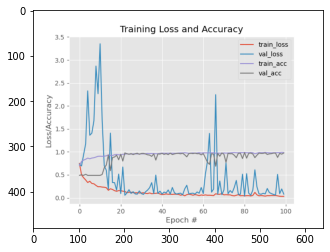

In [6]:
img = plt.imread('plot_gender.png')
imgplot = plt.imshow(img)
plt.show()

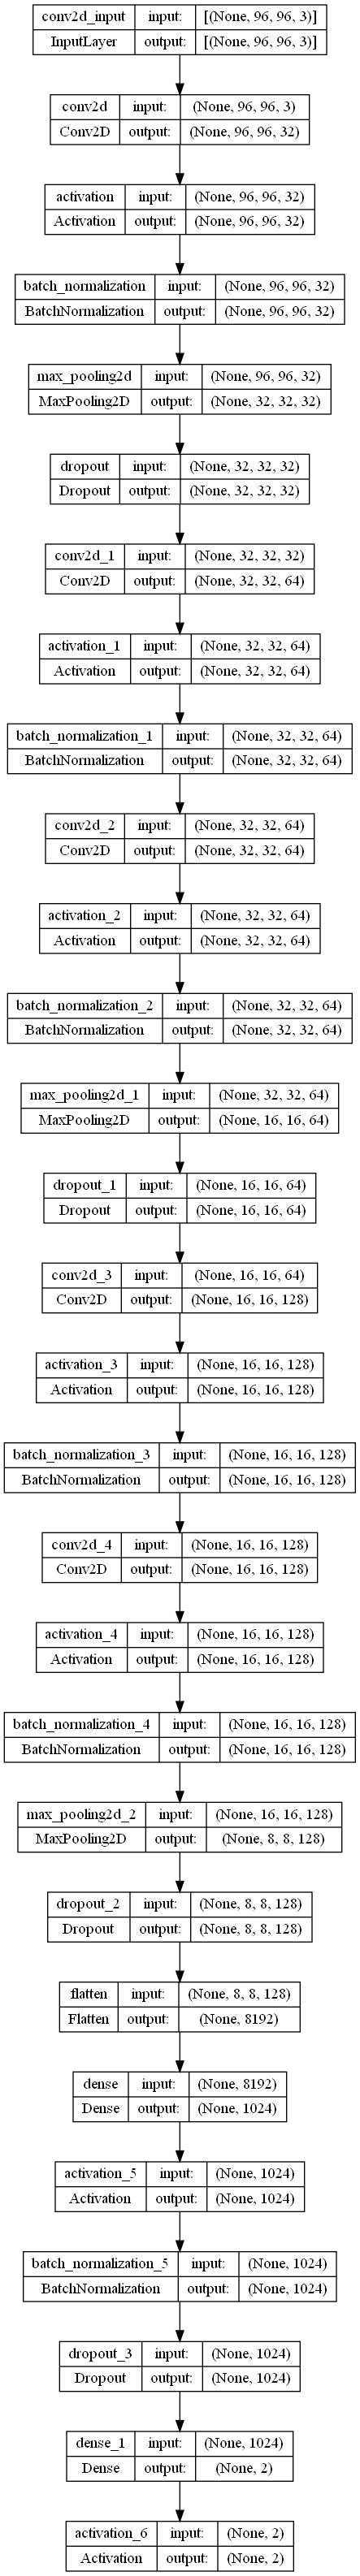

In [6]:
plot_model(model, to_file='idk.png', show_shapes=True)

In [ ]:
INIT_LR = 1e-4
EPOCHS = 14 
BS = 32
DIRECTORY = r"C:\\Users\\Fader\Dev\\Gender-Detection-master\\hijab_dataset"
CATEGORIES = ["hijab", "nonhijab"]
print("[INFO] loading images...")
data = []
labels = []
for category in CATEGORIES:
	path = os.path.join(DIRECTORY, category)
	for img in os.listdir(path):
		img_path = os.path.join(path, img)
		image = load_img(img_path, target_size=(224, 224))
		image = img_to_array(image)
		image = preprocess_input(image)
		data.append(image)
		labels.append(category)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
data = np.array(data, dtype="float32")
labels = np.array(labels)
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=41)

aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(250, activation="relu")(headModel)
headModel = Dense(200, activation="relu")(headModel)
headModel = Dense(150, activation="relu")(headModel)
headModel = Dense(100, activation="relu")(headModel)
headModel = Dense(50, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))
print("[INFO] saving hijab detector model...")
model.save("hijab.model", save_format="h5")

N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot_hijab.png")

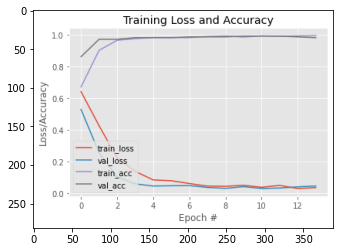

In [7]:
img = plt.imread('plot_hijab.png')
imgplot = plt.imshow(img)
plt.show()

1/1 [==============================] - 2s 2s/step
prediction is no hijab
1/1 [==============================] - 0s 381ms/step
prediction is woman


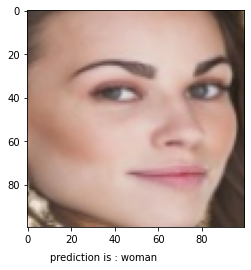

In [27]:
path = random.choice(os.listdir("test"))
img = "test\\" + path

gender_model = load_model('gender.model')
hijab_model = load_model('hijab.model')
gender_classes = ['man','woman']
hijab_classes = ['hijab','no hijab']

def detect_gender(image):
    img = cv2.imread(image)
    dim = (96, 96)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite("face.jpg", resized)
    img = cv2.imread('face.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgr = cv2.resize(img, (100,100))
    plt.imshow(imgr, cmap=plt.cm.binary)
    prediction = gender_model.predict(np.array([img]) / 255)
    index = np.argmax(prediction)
    prediction = gender_classes[index]
    print(f'prediction is {gender_classes[index]}')
    os.remove('face.jpg')
    return prediction

def detect_hijab(image):
    img = cv2.imread(image)
    dim = (224, 224)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite("face.jpg", resized)
    img = cv2.imread('face.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgr = cv2.resize(img, (100,100))
    plt.imshow(imgr, cmap=plt.cm.binary)
    prediction = hijab_model.predict(np.array([img]) / 255)
    index = np.argmax(prediction)
    prediction = hijab_classes[index]
    print(f'prediction is {hijab_classes[index]}')
    os.remove('face.jpg')
    return prediction

prediction = detect_hijab(img)
if prediction == 'hijab':
    print("prediction is woman")
    plt.text(10, 115, "prediction is : woman with hijab")
else:
    prediction = detect_gender(img)
    plt.text(10, 115, "prediction is : " + prediction)